# Analysis of deviations from normality

Much work in mathematical finance assumes that prices follow a lognormal geometric random walk or its continuous-time analog, geometric Brownian
motion. So a natural question is whether this assumption is usually true. The lognormal geometric random walk makes two assumptions: [[1]]

    1. the log returns are normally distributed and 
    2. the log returns are mutually independent.

In this document we will analyze whether the first assumption holds in real stock data and we will skip the analysis of the second assumption for a later analysis.

First, we will simulate some stock returns that follow a geometric random walk, to get a feeling of what would the data look like in that case. Afterwards, we will download the data from the Fama and French library for the returns of small and big caps stocks and we will analyze whether the normality assumption holds.

By: Ismael Jiménez

License: MIT

Import the necessary quantopy subpackages.

In [1]:
import quantopy as qp

# First a bit of Theory: Skewness, Kurtosis, and Moments

To do justice to the actual returns distribution we should look to thigher moments than just the mean and variance. We will look in particular at Skewness and Kurtosis to characterize the shape of a probability distribution

*Skewness* measures the degree of asymmetry, with symmetry implying zero skewness, positive skewness indicating a relatively long right tail compared to the left tail, and negative skewness indicating the opposite. The next figure shows the three densities.

![Skewness]("https://en.wikipedia.org/wiki/File:Relationship_between_mean_and_median_under_different_skewness.png")


Kurtosis indicates the extent to which probability is concentrated in the center and especially the tails of the distribution rather than in the “shoulders,” which are the regions between the center and the tails. The kurtosis of a normal random variable is 3.

Every normal distribution has a skewness coefficient of 0 and a kurtosis of 3. The skewness and kurtosis must be the same for all normal distributions,
because the normal distribution has only location and scale parameters, no shape parameters.

## The Jarque–Bera Test

The Jarque–Bera test of normality compares the sample skewness and kurtosis to 0 and 3, their values under normality. The test statistic is 0 when Skew and Kurtosis, have the values 0 and 3, the values expected under normality, and increases as Skew and Kurtosis deviate from these values. [[1]]

## Simulate Geometric Random Walk Returns

First we will simulate the returns for 2 random variables that follow a geometric random walk. We will use *mean* and *std* deviation values similar to the monthly returns we can find in the market:

$R_{1}$ = $  \mathcal{Lognormal}(\mu, \sigma^2) = \mathcal{Lognormal}(0.017, 0.1^2) $

$R_{2}$ = $ \mathcal{Lognormal}(\mu, \sigma^2) = \mathcal{Lognormal}(0.009, 0.05^2) $


<AxesSubplot:title={'center':'Log Returns Density'}, ylabel='Density'>

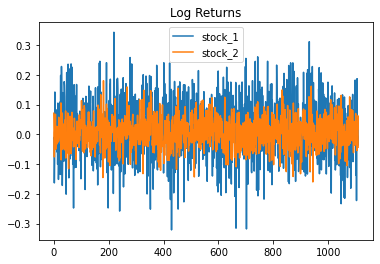

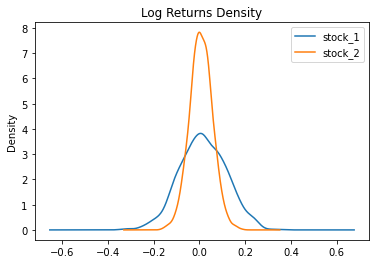

In [15]:
# Dataframe
returns = qp.random.generator.returns([0.012, 0.007], [0.1, 0.05], 1110, "lognormal")
returns.columns = ['stock_1', 'stock_2']
log_returns = returns.log()
log_returns.plot.line(title='Log Returns')
log_returns.plot.density(title='Log Returns Density')

If we take a look at the Skew and Kurtosis of the log returns, we can see that they are compatible with the normal distribution hipothesis:

In [3]:
print(f'Log Returns Skew: ')
print(log_returns.skew())
print(f'\nLog Returns Kurtosis: ')
print(log_returns.kurtosis())

Log Returns Skew: 
stock_1   -0.053784
stock_2   -0.061350
dtype: float64

Log Returns Kurtosis: 
stock_1    2.982190
stock_2    2.817073
dtype: float64


The Skew for both signal is close to 0 and Kurtosis is close to 3. More formally we can confirm that the log returns are normally distributed with the Jarque-Berra test:

In [4]:
print(f'Log Returns Is_Normal: ')
print(log_returns.is_normal())

Log Returns Is_Normal: 
stock_1    True
stock_2    True
Name: 1, dtype: bool


So we can conclude that the log returns of the 2 generated signals are normally distributed and per definition simple returns follow then a geometric random walk.

## Analyze Geometric Random Walk with real data

We will now analyze the hypothesis of the Geometric Random Walk  with the returns of equal-weighted portfolios divided on size, retrieved from the Fama and French library. 

First we need to download the data of all portfolios divided on size, and we will list all options available for portfolio selection.

In [5]:
ds = qp.get('Portfolios_Formed_on_ME', 'famafrench', end='2018-12')
print(ds['DESCR'])

Portfolios Formed on ME
-----------------------

This file was created by CMPT_ME_RETS using the 202104 CRSP database. It contains value- and equal-weighted returns for size portfolios. Each record contains returns for: Negative (not used) 30% 40% 30%   5 Quintiles  10 Deciles The portfolios are constructed at the end of Jun. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Value Weight Returns -- Monthly (1110 rows x 19 cols)
  1 : Equal Weight Returns -- Monthly (1110 rows x 19 cols)
  2 : Value Weight Returns -- Annual from January to December (92 rows x 19 cols)
  3 : Equal Weight Returns -- Annual from January to December (92 rows x 19 cols)
  4 : Number of Firms in Portfolios (1110 rows x 19 cols)
  5 : Average Firm Size (1110 rows x 19 cols)


Now we can select the data for the equal-weighted portfolios.

In [6]:
portfolio = ds[1]
portfolio.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,NaN,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0142,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
1926-08,NaN,0.0374,0.0304,0.0209,0.0360,0.0359,0.0371,0.0161,0.0233,0.0461,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
1926-09,NaN,-0.0107,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0091,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
1926-10,NaN,-0.0329,-0.0352,-0.0306,-0.0325,-0.0410,-0.0289,-0.0336,-0.0295,-0.0472,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
1926-11,NaN,-0.0046,0.0382,0.0309,-0.0054,0.0218,0.0341,0.0339,0.0316,-0.0077,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


As we want to work with small and big caps, we will retrieve the data from the companies in the top and bottom decile.

<AxesSubplot:title={'center':'Log Returns Density'}, ylabel='Density'>

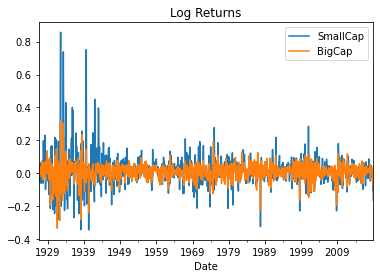

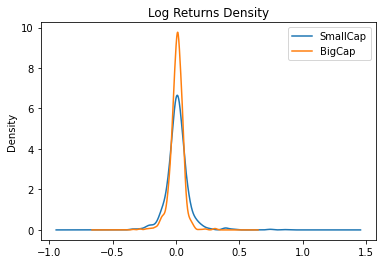

In [16]:
columns = ['Lo 10', 'Hi 10']
returns = portfolio[columns]
returns.columns = ['SmallCap', 'BigCap']
log_returns = returns.log()
log_returns.plot.line(title='Log Returns')
log_returns.plot.density(title='Log Returns Density')

Next we can have a look at the *mean* and *std* for the SmallCap and BigCap portofolio, and we can see that they have similar values to the returns we have simulated in our previous step.

In [8]:
print(f'Log Returns Mean: ')
print(log_returns.mean())
print(f'\nLog Returns Std: ')
print(log_returns.std())

Log Returns Mean: 
SmallCap    0.012871
BigCap      0.007396
dtype: float64

Log Returns Std: 
SmallCap    0.092111
BigCap      0.053784
dtype: float64


As we can see even though the SmallCap and BigCap *mean* and *std* are similar to the ones generated, the plot of the returns look much different. We can clearly see that the probability of returns that have a big deviation from the mean is much bigger in the real data. But under the normality assumption, there is little probability that returns take big possitive or negative values.

We can now check the skew and kurtosis values for both portfolios to check if our intuition is correct:

In [20]:
print(f'Log Returns Skew: ')
print(log_returns.skew())
print(f'Log Returns Kurtosis: ')
print(log_returns.kurtosis())

Log Returns Skew: 
SmallCap    1.912991
BigCap     -0.485046
dtype: float64
Log Returns Kurtosis: 
SmallCap    18.962391
BigCap       9.863593
dtype: float64


By analyzing the skewness of both distributions, we see that they are quite simetrical although not completely. We find that SmallCap portfolio has a positive skew, what implies that we can expect recurrent small losses and few large returns from investment. And BigCap have an small negative skew, what means that we can expect many small wins and a few large losses on the investment. 

What is a significant divergence with respect to the normal hypothesis is the kurtosis of both portfolios. 

More formally, we can confirm whether the deviations from normality are significant with the jarque-Berra test:

In [17]:
print(f'Log Returns Is_Normal: ')
print(log_returns.is_normal())

Log Returns Is_Normal: 
SmallCap    False
BigCap      False
Name: 1, dtype: bool


And, as expected, we can see that the log returns of both portfolios do not follow a normal distributio.

# Conclusion
So a natural question after our analysis is whether the assumption of normality for log returns is usually true, and the quick answer is a clear “no.” As we have seen though the return density has a bell shape somewhat like that of normal densities, the tails of the log return distributions are generally much heavier than normal tails. Typically, a t-distribution with a small degrees-of-freedom parameter, say 4–6, is a much better fit than the normal model. However, the log-return distributions do appear to be symmetric, or at least nearly so.

We get to the conclusion that the assumption of log returns normal distribution is a simplyfing assumption, that understimate the magnitude of the extreme returns. Crashes and big upside returns occur are much more often than what we would expect under a normal distribution. [[2]] But before discarding the assumption that the prices of an asset are a lognormal geometric random walk, it is worth remembering Box’s dictum that “all models are false, but some models are useful.” This assumption is sometimes useful, e.g., for deriving the famous Black–Scholes formula. [[1]]

## Sources

[1] Ruppert and Matteson " Statistics and Data Analysis for Financial Engineering, 2nd edition", *Springer*. Chapter §2.2.3

[2] Lionel Martellini "Deviations from normality" EDHEC-Risk Institute.